## Perth Basin Case Study using Loop2Flopy

In [17]:
import numpy as np
import pandas as pd
import numbers

### Importing Borehole Data

In [18]:
bore_info = pd.read_excel("../Geological_data/Dwer_data\Formation picks.xls",sheet_name = "bore_info")
strat_info = pd.read_excel("../Geological_data/Dwer_data\Formation picks.xls",sheet_name = "strat_info")
bore_info

,Easting,Northing,Source,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,-999.0,-999.0,PRAMS Formation Picks,JWS1,22.0,45,-,-,-,-,...,236,342,429,484,555,-,-,-,822,-
1,-999.0,-999.0,PRAMS Formation Picks,P7,67.0,6,-,-,-,-,...,-,256,277,350,-,555,-,-,-,-
2,-999.0,-999.0,PRAMS Formation Picks,WP,4.0,30,-,-,-,-,...,-,67,207,324,399,-,-,-,449,-
3,329743.0,6617059.0,PRAMS Formation Picks,ML8,39.0,24,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,387569.0,6613192.0,PRAMS Formation Picks,ML2,206.0,3,-,-,-,-,...,27,298,346,-,-,762,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,387523.0,6403674.0,PRAMS Formation Picks,AM65,2.0,9,57,-,-,-,...,-,69,188,208,-,-,-,-,-,363
408,403632.0,6402890.0,PRAMS Formation Picks,AM69,41.0,2,-,-,-,-,...,-,-,60,-,-,-,-,-,-,417
409,382835.0,6402182.0,PRAMS Formation Picks,AM67,11.0,21,44,-,-,-,...,-,96,186,246,-,-,-,-,-,375
410,390782.0,6398413.0,PRAMS Formation Picks,AM68,9.0,8,58,-,-,-,...,-,80,176,203,287,-,-,-,-,327


### Filter data
Crop to desired area and delete columns of less than 2 data points

In [42]:
df = bore_info.copy()
x0, x1, y0, y1, z0, z1 = 355000, 390000, 6527000, 6537000, -1200, 200 
#x0, x1, y0, y1, z0, z1 = 355000, 390000, 6527000, 6537000, -1200, 200 # Whole Block
df = df.loc[(df['Northing'] >= y0)] 
df = df.loc[(df['Northing'] <= y1)]
df = df.loc[(df['Easting'] <= x1)]
df = df.drop(['Source'], axis=1)
df = df.drop(['Tr','Tkm', 'Tk','Tkc','Jc','Kcom','Kps','Kpo','Kpc','Kcoh','Kcp'], axis=1)
df = df.reset_index(drop=True)

df

,Easting,Northing,ID,Ground,TQ,Kcl,Kcg,Kcm,Kcok,Kwlp,Kwlw,Kwlm,Kws,Kwg,Jy
0,367173.0,6535521.0,AM3,27.00,39,44,60,70,164,167,606,729,-,-,-
1,383790.0,6535459.0,AM4,50.00,41,-,-,-,-,92,143,200,204,332,549
2,374139.0,6535349.0,TPK,60.00,42,-,-,-,-,-,168,-,-,-,-
3,362041.0,6534075.0,GB4,9.00,45,53,66,86,165,175,535,-,-,-,-
4,373194.0,6533955.0,GB3,31.00,34,-,-,-,-,40,235,360,376,405,719
5,366379.0,6533124.0,GB2,58.00,46,-,-,-,-,97,152,168,-,-,509
6,384139.0,6532149.0,SN786,135.00,-,-,-,-,-,81,135,-,-,-,-
7,356924.0,6531829.0,AM1,53.00,99,157,167,218,-,222,499,505,517,-,-
8,365646.0,6529649.0,AM2,36.00,61,96,120,123,210,220,605,775,803,829,881
9,386985.0,6529614.0,AM6,64.00,28,-,-,-,-,-,80,-,-,-,300


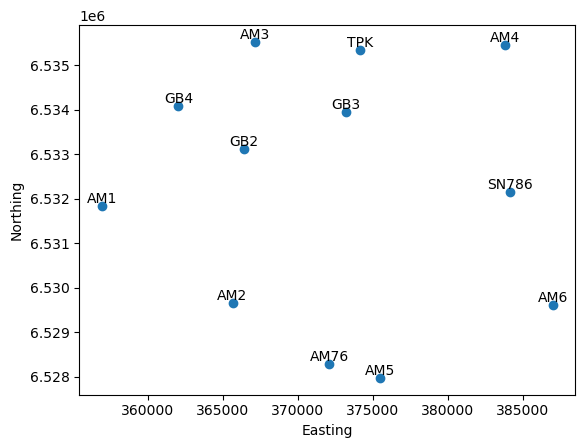

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plan of data points
plt.scatter(df.Easting, df.Northing)
plt.xlabel('Easting')
plt.ylabel('Northing')
i = 0
for (xi, yi) in zip(df.Easting, df.Northing):
    plt.text(xi, yi, df.ID[i], va='bottom', ha='center')
    i += 1
#plt.plot([fx1, fx2], [fy1, fy2])
#plt.plot(fault_center[0], fault_center[1], 'o')
#plt.xlim(x0,x1)
#plt.ylim(y0,y1)

In [44]:
lithcodes = list(df.columns.values[3:])         # Make a list of formations  
df.Easting = pd.to_numeric(df.Easting)
df.Northing = pd.to_numeric(df.Northing)
df.Ground = pd.to_numeric(df.Ground)
print(lithcodes)

['Ground', 'TQ', 'Kcl', 'Kcg', 'Kcm', 'Kcok', 'Kwlp', 'Kwlw', 'Kwlm', 'Kws', 'Kwg', 'Jy']


In [45]:
strat = []

for i, lith in enumerate(lithcodes):
    index = i
    lithid = i-1
    val = 120 - i*100 # arbitrary isolvalue
    sequence = strat_info.loc[strat_info['unit'] == lith, 'sequence'].item()
    R = strat_info.loc[strat_info['unit'] == lith, 'R'].item()/255
    G = strat_info.loc[strat_info['unit'] == lith, 'G'].item()/255
    B = strat_info.loc[strat_info['unit'] == lith, 'B'].item()/255
    strat.append([index, lithid, lith, sequence, val, [round(R,2),round(G,2),round(B,2)]])
strat = pd.DataFrame(strat)
strat.columns =['index','lithid','lithcode','sequences','vals','color']
strat

,index,lithid,lithcode,sequences,vals,color
0,0,-1,Ground,Quaternary,120,"[1.0, 1.0, 1.0]"
1,1,0,TQ,Quaternary,20,"[1.0, 1.0, 0.0]"
2,2,1,Kcl,Coolyena,-80,"[0.67, 0.8, 0.0]"
3,3,2,Kcg,Coolyena,-180,"[0.67, 0.85, 0.6]"
4,4,3,Kcm,Coolyena,-280,"[0.67, 0.78, 0.71]"
5,5,4,Kcok,Coolyena,-380,"[1.0, 0.8, 0.6]"
6,6,5,Kwlp,Warnbro,-480,"[0.8, 1.0, 0.2]"
7,7,6,Kwlw,Warnbro,-580,"[0.6, 0.8, 0.0]"
8,8,7,Kwlm,Warnbro,-680,"[0.4, 0.6, 0.0]"
9,9,8,Kws,Warnbro,-780,"[0.58, 0.54, 0.33]"


### Make lithology table for Loop

In [49]:
data_list = df.values.tolist()             # Turn data into a list of lists
formatted_data = []

for i in range(len(data_list)): #iterate for each row
    
    boreid = data_list[i][2]
    easting, northing = data_list[i][0], data_list[i][1]
    groundlevel = data_list[i][3]    
    
    # set orientation data for corner wells
    if boreid == 'AM1' or boreid == 'AM6':
        gx, gy, gz = 0, 0, 1
    else: 
        gx, gy, gz = np.nan, np.nan, np.nan
        
    # Add data for groundlevel
    val = strat.vals[0]
    formatted_data.append([boreid, easting, northing, groundlevel, val, 'Ground', 'Quaternary', gx, gy, gz]) 

    # Add data row for each lithology
    count = 1
    for j in range(4,df.shape[1]-1): #iterate through each formation until before Yarragade
        
        # Add lithology
        if isinstance(data_list[i][j], numbers.Number) == True:    
            bottom    = groundlevel - float(data_list[i][j])  # Ground surface - formation bottom (mbgl)
            val       = strat.vals[count]                      # designated isovalue
            lithid    = lithcodes[count]                       # lithology id 
            feat_name = strat.sequences[count]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
   
    # For absent units, put in a dummy point 1m higher than last detected unit (and with UC, should form a pinchout)    
        else:
            bottom    = current_bottom - 0.01*count
            val       = strat.vals[count]                      # designated isovalue
            lithid    = lithcodes[count]                       # lithology id 
            feat_name = strat.sequences[count]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])

        current_bottom = np.copy(bottom) 
        count+=1
        
data = pd.DataFrame(formatted_data)
data.columns =['ID','X','Y','Z','val','lithcode','feature_name', 'gx', 'gy', 'gz']

data["strike"]=np.nan
data["dip"]=np.nan
data["nx"]=np.nan
data["ny"]=np.nan
data["nz"]=np.nan

sequences = data['feature_name'].unique()
data

,ID,X,Y,Z,val,lithcode,feature_name,gx,gy,gz,strike,dip,nx,ny,nz
0,AM3,367173.0,6535521.0,27.00,120,Ground,Quaternary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AM3,367173.0,6535521.0,-12.00,20,TQ,Quaternary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AM3,367173.0,6535521.0,-17.00,-80,Kcl,Coolyena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM3,367173.0,6535521.0,-33.00,-180,Kcg,Coolyena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AM3,367173.0,6535521.0,-43.00,-280,Kcm,Coolyena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,AM5,375480.0,6527971.0,-2.20,-480,Kwlp,Warnbro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,AM5,375480.0,6527971.0,-190.00,-580,Kwlw,Warnbro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,AM5,375480.0,6527971.0,-225.00,-680,Kwlm,Warnbro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,AM5,375480.0,6527971.0,-225.09,-780,Kws,Warnbro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#filtered_df = data[data.ID == 'AM5'] 
for lith in lithcodes:
    filtered_df = data[data.lithcode == lith] 
    print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])


 Lithology =  Ground 

         ID         X          Y       Z  val lithcode feature_name   gx   gy  \
0      AM3  367173.0  6535521.0   27.00  120   Ground   Quaternary  NaN  NaN   
11     AM4  383790.0  6535459.0   50.00  120   Ground   Quaternary  NaN  NaN   
22     TPK  374139.0  6535349.0   60.00  120   Ground   Quaternary  NaN  NaN   
33     GB4  362041.0  6534075.0    9.00  120   Ground   Quaternary  NaN  NaN   
44     GB3  373194.0  6533955.0   31.00  120   Ground   Quaternary  NaN  NaN   
55     GB2  366379.0  6533124.0   58.00  120   Ground   Quaternary  NaN  NaN   
66   SN786  384139.0  6532149.0  135.00  120   Ground   Quaternary  NaN  NaN   
77     AM1  356924.0  6531829.0   53.00  120   Ground   Quaternary  0.0  0.0   
88     AM2  365646.0  6529649.0   36.00  120   Ground   Quaternary  NaN  NaN   
99     AM6  386985.0  6529614.0   64.00  120   Ground   Quaternary  0.0  0.0   
110   AM76  372107.1  6528279.3   31.57  120   Ground   Quaternary  NaN  NaN   
121    AM5  375

### Create Geomodel

In [51]:
from LoopStructural import GeologicalModel
origin  = (x0, y0, z0)
maximum = (x1, y1, z1)
geomodel = GeologicalModel(origin, maximum)
geomodel.data = data

### Add surfaces

In [52]:
Quaternary = geomodel.create_and_add_foliation("Quaternary", nelements=1e5)
QuatUC     = geomodel.add_unconformity(Quaternary, strat.vals[1]) # Clips above

Coolyena = geomodel.create_and_add_foliation("Coolyena",nelements=1e5)
CoolUC   = geomodel.add_unconformity(Coolyena, strat.vals[5])

Warnbro = geomodel.create_and_add_foliation("Warnbro",nelements=1e5)
WarnUC  = geomodel.add_unconformity(Warnbro, strat.vals[10])

Yarragadee = geomodel.create_and_add_foliation("Yarragadee",nelements=1e5)

print(data.feature_name.unique())

['Quaternary' 'Coolyena' 'Warnbro']


### Add Stratigraphy Column

In [53]:
stratigraphic_column = {}
stratigraphic_column["Quaternary"] = {}
stratigraphic_column["Coolyena"] = {}
stratigraphic_column["Warnbro"] = {}
stratigraphic_column["Yarragadee"] = {}

for i in range(len(lithcodes)-1):

    sequence = strat.iloc[i].sequences
    lith     = strat.iloc[i].lithcode
    lithid   = strat.iloc[i].lithid
    color    = strat.iloc[i].color  
    
    if i == 0: # Top unit
        minval   = strat.iloc[i].vals
        stratigraphic_column[sequence][lith] = {'min':minval,'max':np.inf,'id':lithid, 'color':color} 
  
    if i > 0 and i < len(lithcodes)-1 : # middle units
        minval   = strat.iloc[i].vals
        maxval   = strat.iloc[i-1].vals
        stratigraphic_column[sequence][lith] = {'min':minval,'max':maxval,'id':lithid, 'color':color}
        
    if i == len(lithcodes)-1: # Bottom unit
        maxval   = strat.iloc[i-1].vals
        stratigraphic_column[sequence][lith] = {'min':-np.inf,'max':maxval,'id':lithid,  'color':color}   
    
geomodel.set_stratigraphic_column(stratigraphic_column)

#stratigraphic_column

In [12]:
'''stratigraphic_column = {}
stratigraphic_column["Quaternary"] = {}
stratigraphic_column["Quaternary"]["Ground"] =  {'min':strat.vals[0],'max':np.inf,'id':-1}
stratigraphic_column["Quaternary"]["TQ"]     =  {'min':strat.vals[1],'max':strat.vals[0],'id':0}

stratigraphic_column["Coolyena"] = {}
stratigraphic_column["Coolyena"]["Kcl"] =  {'min':strat.vals[2],'max':strat.vals[1], 'id':1}
stratigraphic_column["Coolyena"]["Kcp"] =  {'min':strat.vals[3],'max':strat.vals[2],'id':2}
stratigraphic_column["Coolyena"]["Kcg"] =  {'min':strat.vals[4],'max':strat.vals[3],'id':3}
stratigraphic_column["Coolyena"]["Kcm"] =  {'min':strat.vals[5],'max':strat.vals[4],'id':4}
stratigraphic_column["Coolyena"]["Kcom"] = {'min':strat.vals[6],'max':strat.vals[5],'id':5}
stratigraphic_column["Coolyena"]["Kcok"] = {'min':strat.vals[7],'max':strat.vals[6],'id':6}
stratigraphic_column["Coolyena"]["Kcoh"] = {'min':strat.vals[8],'max':strat.vals[7],'id':7}

stratigraphic_column["Warnbro"] = {}
stratigraphic_column["Warnbro"]["Kwlp"] =  {'min':strat.vals[9],'max':strat.vals[8], 'id':8}
stratigraphic_column["Warnbro"]["Kwlw"] =  {'min':strat.vals[10],'max':strat.vals[9],'id':9}
stratigraphic_column["Warnbro"]["Kwlm"] =  {'min':strat.vals[11],'max':strat.vals[10],'id':10}
stratigraphic_column["Warnbro"]["Kws"] =   {'min':strat.vals[12],'max':strat.vals[11],'id':11}
stratigraphic_column["Warnbro"]["Kwg"] =   {'min':strat.vals[13],'max':strat.vals[12],'id':12}

stratigraphic_column["Yarragadee"] = {}
stratigraphic_column["Yarragadee"]["Kpc"] = {'min':strat.vals[14],'max':strat.vals[13], 'id':13}
stratigraphic_column["Yarragadee"]["Kps"] = {'min':strat.vals[15],'max':strat.vals[14],'id':14}
stratigraphic_column["Yarragadee"]["Kpo"] = {'min':strat.vals[16],'max':strat.vals[15],'id':15}
stratigraphic_column["Yarragadee"]["Jy"]  = {'min':strat.vals[17],'max':strat.vals[16],'id':16}
stratigraphic_column["Yarragadee"]["Jc"]  = {'min':-np.inf,'max':strat.vals[17],'id':17}

geomodel.set_stratigraphic_column(stratigraphic_column)'''

'stratigraphic_column = {}\nstratigraphic_column["Quaternary"] = {}\nstratigraphic_column["Quaternary"]["Ground"] =  {\'min\':strat.vals[0],\'max\':np.inf,\'id\':-1}\nstratigraphic_column["Quaternary"]["TQ"]     =  {\'min\':strat.vals[1],\'max\':strat.vals[0],\'id\':0}\n\nstratigraphic_column["Coolyena"] = {}\nstratigraphic_column["Coolyena"]["Kcl"] =  {\'min\':strat.vals[2],\'max\':strat.vals[1], \'id\':1}\nstratigraphic_column["Coolyena"]["Kcp"] =  {\'min\':strat.vals[3],\'max\':strat.vals[2],\'id\':2}\nstratigraphic_column["Coolyena"]["Kcg"] =  {\'min\':strat.vals[4],\'max\':strat.vals[3],\'id\':3}\nstratigraphic_column["Coolyena"]["Kcm"] =  {\'min\':strat.vals[5],\'max\':strat.vals[4],\'id\':4}\nstratigraphic_column["Coolyena"]["Kcom"] = {\'min\':strat.vals[6],\'max\':strat.vals[5],\'id\':5}\nstratigraphic_column["Coolyena"]["Kcok"] = {\'min\':strat.vals[7],\'max\':strat.vals[6],\'id\':6}\nstratigraphic_column["Coolyena"]["Kcoh"] = {\'min\':strat.vals[8],\'max\':strat.vals[7],\'id\

In [13]:
#stratigraphic_column

### 3D View

In [14]:
# View "model surfaces"
figure = False ### LavaVu Geo model 3D
if figure:
    from LoopStructural.visualisation import LavaVuModelViewer
    view = LavaVuModelViewer(geomodel, background='white')
    view.interactive(popout=True) 
    view.add_model_surfaces(faults = False, cmap = 'Spectral') #faults=False
    #view.add_isosurface(Fault,isovalue=0)
    view.set_zscale(zscale = 10)
    #view.add_points(points = np.array(fault_plane_3d), name = 'fault')

### 2D View

In [15]:
#from matplotlib.colors import ListedColormap
#import matplotlib.colors
#colors = list(zip(strat.R, strat.G, strat.B))
#cmap = ListedColormap(colors, name='perth_geo')
#labels = np.copy(lithcodes)

strat

,index,lithid,lithcode,sequences,vals,color
0,0,-1,Ground,Quaternary,120,"[1.0, 1.0, 1.0]"
1,1,0,TQ,Quaternary,20,"[1.0, 1.0, 0.0]"
2,2,1,Kcl,Coolyena,-80,"[0.67, 0.8, 0.0]"
3,3,2,Kcg,Coolyena,-180,"[0.67, 0.85, 0.6]"
4,4,3,Kcm,Coolyena,-280,"[0.67, 0.78, 0.71]"
5,5,4,Kcok,Coolyena,-380,"[1.0, 0.8, 0.6]"
6,6,5,Kwlp,Warnbro,-480,"[0.8, 1.0, 0.2]"
7,7,6,Kwlw,Warnbro,-580,"[0.6, 0.8, 0.0]"
8,8,7,Kwlm,Warnbro,-680,"[0.4, 0.6, 0.0]"
9,9,8,Kws,Warnbro,-780,"[0.58, 0.54, 0.33]"


In [ ]:
y_transects = [6505000, 6515000, 6525000]
Quaternary_levels = [strat.vals[1], strat.vals[0], 9999]
Coolyena_levels = [strat.vals[5], strat.vals[4], strat.vals[3], strat.vals[2], strat.vals[1], 9999]
Warnbro_levels = [strat.vals[10], strat.vals[9], strat.vals[8], strat.vals[7], strat.vals[6], strat.vals[5], 9999]
Yarragadee_levels =[-9999, strat.vals[10], 9999]

figure = True
if figure == True:   
    
    fig, ax = plt.subplots(3,1,figsize=(6,6))

    delx, delz = 100, 100
    x, z = np.linspace(x0,x1,delx), np.linspace(z0,z1,delz)
    xx, zz = np.meshgrid(x,z)
    yy = np.zeros_like(xx)
    yy[:] = y_transects[0]
    ax[0].set_title('Section A (y = %i)' %y_transects[0])

    vals1 = geomodel.evaluate_feature_value('Quaternary',np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T)
    ax[0].contourf(vals1.reshape((delx, delz)), levels = Quaternary_levels, extent=(x0, x1, z0, z1))
    vals2 = geomodel.evaluate_feature_value('Coolyena',np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T)
    ax[0].contourf(vals2.reshape((delx, delz)), levels = Coolyena_levels, extent=(x0, x1, z0, z1))
    vals3 = geomodel.evaluate_feature_value('Warnbro',np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T)
    ax[0].contourf(vals3.reshape((delx, delz)), levels = Warnbro_levels, extent=(x0, x1, z0, z1))
    vals4 = geomodel.evaluate_feature_value('Yarragadee',np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T)
    ax[0].contourf(vals4.reshape((delx, delz)), levels = Yarragadee_levels, extent=(x0, x1, z0, z1))
    
    yy[:] = y_transects[1]
    ax[1].set_title('Section B (y = %i)' %y_transects[1])

    vals1 = geomodel.evaluate_feature_value('Quaternary',np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T)
    ax[1].contourf(vals1.reshape((delx, delz)), levels = Quaternary_levels, extent=(x0, x1, z0, z1))
    vals2 = geomodel.evaluate_feature_value('Coolyena',np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T)
    ax[1].contourf(vals2.reshape((delx, delz)), levels = Coolyena_levels, extent=(x0, x1, z0, z1))
    vals3 = geomodel.evaluate_feature_value('Warnbro',np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T)
    ax[1].contourf(vals3.reshape((delx, delz)), levels = Warnbro_levels, extent=(x0, x1, z0, z1))

    yy = np.zeros_like(xx)
    yy[:] = y_transects[2]
    ax[2].set_title('Section C (y = %i)' %y_transects[2])

    vals1 = geomodel.evaluate_feature_value('Quaternary',np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T)
    ax[2].contourf(vals1.reshape((delx, delz)), levels = Quaternary_levels, extent=(x0, x1, z0, z1))
    vals2 = geomodel.evaluate_feature_value('Coolyena',np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T)
    ax[2].contourf(vals2.reshape((delx, delz)), levels = Coolyena_levels, extent=(x0, x1, z0, z1))
    vals3 = geomodel.evaluate_feature_value('Warnbro',np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T)
    ax[2].contourf(vals3.reshape((delx, delz)), levels = Warnbro_levels, extent=(x0, x1, z0, z1))

    plt.tight_layout() 
    plt.show()

    

In [19]:
delx, delz = 500, 50
print((x1-x0)/delx)
print((z1-z0)/delz)

70.0
28.0


In [ ]:
print(one.reshape(np.shape(Z)))

import matplotlib.pyplot as plt
plt.imshow(Xsect.reshape(np.shape(Z)),origin = 'lower')#, extent = [x[0],x[-1],z[0],z[-1]])
plt.colorbar()

In [ ]:
model.evaluate_model([(350439.0,6566450.0,-500.0)])

In [ ]:
len(x)